# Project Description

Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses:

---

## Initial Data Exploration

1. **Load the dataset**:  
   - Use Pandas to load the dataset.
   - Check for null values and understand the data types.

2. **Examine time series properties**:  
   - Determine the frequency and identify trends in the data.


In [11]:
# 1. **Load the dataset**:  
#    - Use Pandas to load the dataset.
#    - Check for null values and understand the data types.

# 2. **Examine time series properties**:  
#    - Determine the frequency and identify trends in the data.

import pandas as pd
df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W6/D5/EXERCISE XP/AAPL, 1D 01012007-12072023.csv')
df.describe()

,volume,vwap,open,close,high,low,time,transactions
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03,4.159000e+03
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,1.428315e+09,2.709318e+05
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,1.505279e+08,2.510859e+05
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,1.167800e+09,3.048700e+04
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.297876e+09,1.128150e+05
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.428466e+09,1.782460e+05
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,1.558627e+09,3.259555e+05
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,1.689134e+09,2.966979e+06


In [12]:
import matplotlib as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import plotnine as p9
from plotnine import ggplot, aes, geom_bar, theme, element_text, labs
import matplotlib.pyplot as plt
import mplfinance as mpf
import warnings
warnings.filterwarnings("ignore")


# Action Plan for Cleaning Data:
**Based on the distribution above:** 
- Normalize:
    - Time, to represent something other than unix

In [13]:
import datetime
def normalize_time(time):
    time = datetime.datetime.fromtimestamp(time)
    time = time.strftime("%Y-%m-%d")
    return time
def year(time):
    time = datetime.datetime.fromtimestamp(time)
    time = time.strftime("%Y")
    return time
df['date'] = df['time'].apply(normalize_time)
df['year'] = df['time'].apply(year)


Without diving too deep into the data, some basic trends we can see for the price over time increases. There are some fluctiations in the price within each year, however, apple stock becomes more valuable over time. 

Some interesting concepts to look for as I deeper into the data: 
- Price Variance
- Yearly Perforamnce Statistics
- Annual Price Growth
- Volume Trends
- Daily Volatility
- Yearly Volatility
- Candlestick Patterns
- Volume and Price 
- Short-Term vs. Long-Term Moving Averages
- Hypothesis Testing of Yearly Comparisons

----------------------------------------------------------------------

## Data Visualization

1. **Closing prices and traded volume**:  
   - Use Matplotlib to plot the closing prices and traded volume over time.

2. **Candlestick chart**:  
   - Create a candlestick chart to depict high and low prices.

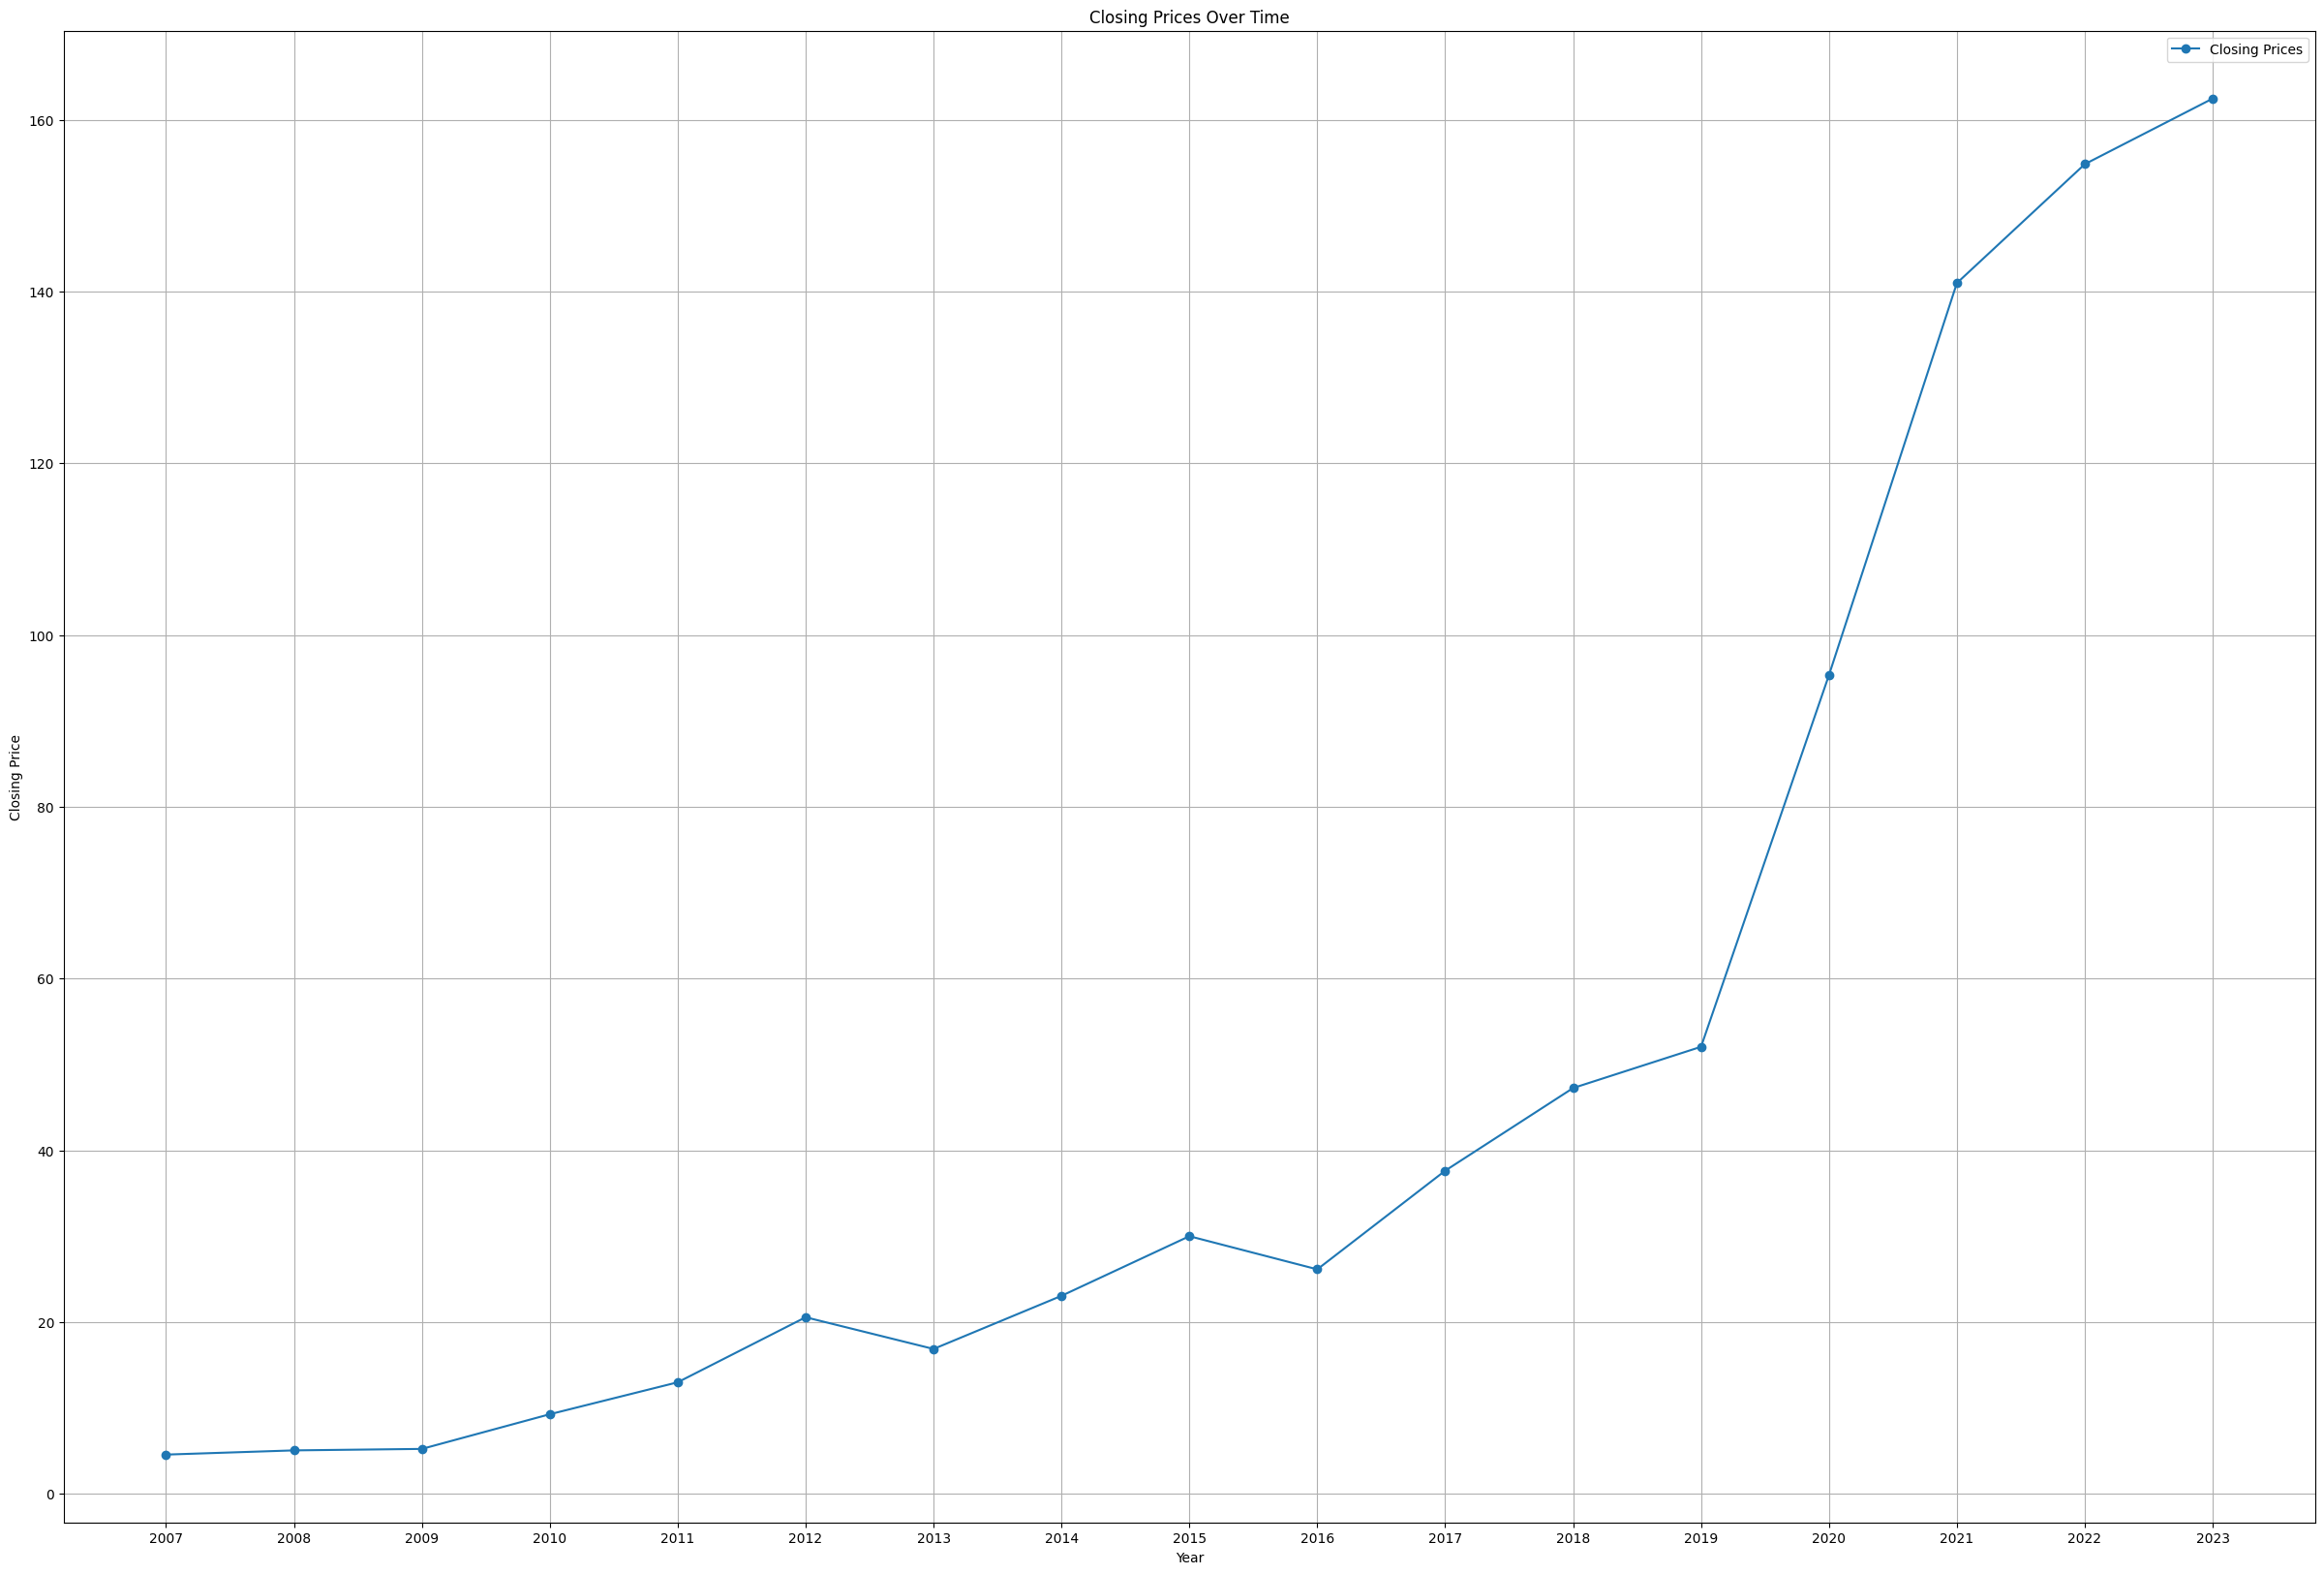

In [14]:
#Use Matplotlib to plot the closing prices and traded volume over time.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

mean_close = df.groupby('year')['close'].mean().reset_index()

plt.figure(figsize=(30, 20))
plt.plot(mean_close['year'], mean_close['close'], label='Closing Prices', marker='o')
plt.title('Closing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

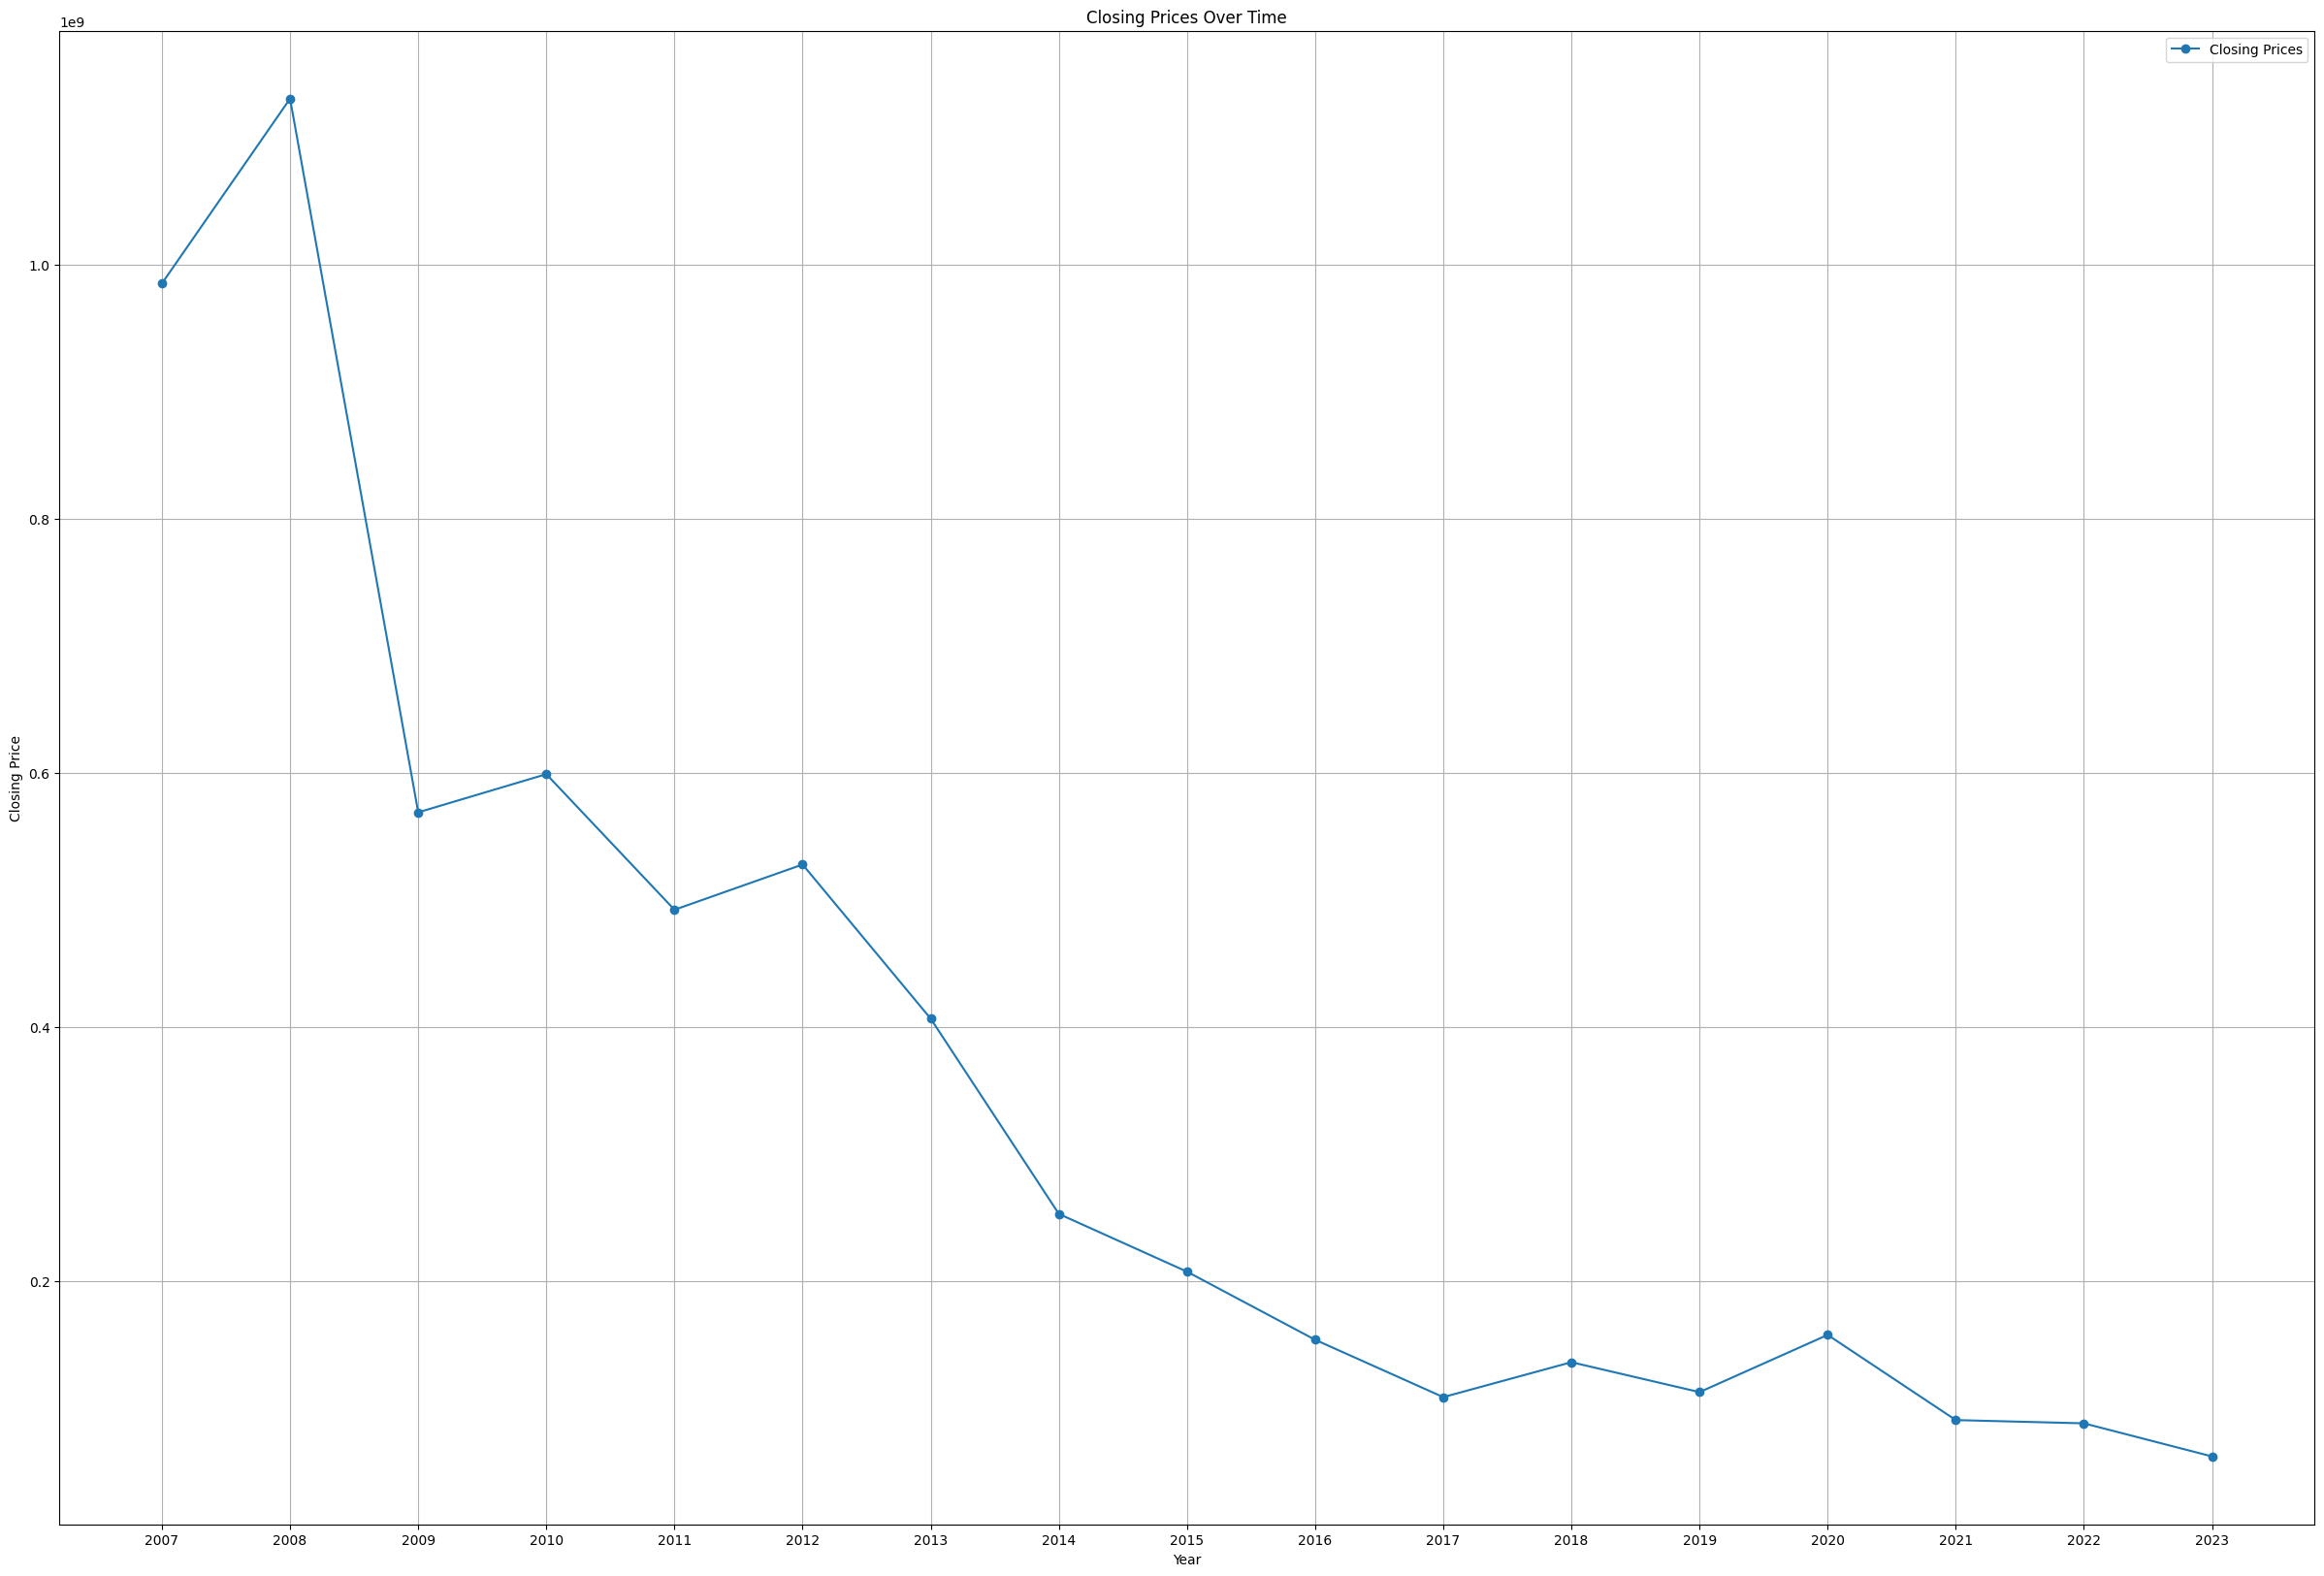

In [15]:
#use matplotlib to plot trading volume over time
mean_volume= df.groupby('year')['volume'].mean().reset_index()

plt.figure(figsize=(30, 20))
plt.plot(mean_volume['year'], mean_volume['volume'], label='Closing Prices', marker='o')
plt.title('Closing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
df.columns

Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions', 'date', 'year'],
      dtype='object')

In [17]:
# Create a candlestick chart to depict high and low prices.
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price',
    title='AAPL Candlestick Chart'
)

fig.show()

--------------------------------------------------------------------------------------------------

## Statistical Analysis

1. **Summary statistics**:  
   - Compute mean, median, and standard deviation for key columns.

2. **Moving average analysis**:  
   - Analyze the closing prices using a moving average.

In [18]:
df.describe()

,volume,vwap,open,close,high,low,time,transactions
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4.159000e+03,4.159000e+03
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,1.428315e+09,2.709318e+05
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,1.505279e+08,2.510859e+05
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,1.167800e+09,3.048700e+04
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,1.297876e+09,1.128150e+05
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,1.428466e+09,1.782460e+05
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,1.558627e+09,3.259555e+05
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,1.689134e+09,2.966979e+06


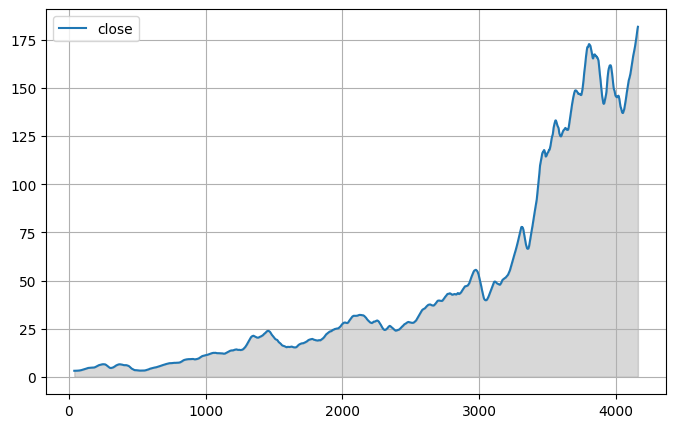

In [19]:
import pandas as pd
import numpy as np


df['close'] = np.round(df['close'].rolling(window=42).mean(), 2)
ax = df[['close']].plot(grid=True, figsize=(8, 5))
ax.fill_between(df.index, df['close'], color='grey', alpha=0.3)

plt.show()



---

## Hypothesis Testing

1. **t-test**:  
   - Compare average closing prices across different years.

2. **Daily returns distribution**:  
   - Examine the distribution of daily returns and test for normality using SciPy.

---

In [23]:
# Hypothesis:
# Null Hypothesis (H0): There is no statistically significant difference in the average annual closing prices across consecutive years.

# Alternate Hypothesis (H1): There is a statistically significant difference in the average annual closing prices across consecutive years.
import pandas as pd
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

average_closing_prices = df.groupby('year')['close'].mean()

close_2020 = df[df['year'] == 2020]['close']
close_2022 = df[df['year'] == 2022]['close']

t_stat, p_value = ttest_ind(close_2020, close_2022)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: nan
P-value: nan






## Advanced Statistical Techniques (Bonus)

1. **Statistical functions in NumPy**:  
   - Use NumPy’s statistical functions for advanced stock data analysis.  
     - Examples:  
       - Employ `np.convolve` for moving averages.  
       - Use `np.corrcoef` to explore correlations between financial metrics.

2. **Correlation analysis**:  
   - Analyze correlations between moving averages of closing prices and trading volume across different time periods.